Is "power creep" a (numerically) observable phenomenon in the game _Magic: the Gathering_? How has power creep changed in each individual color and even Creature type over the years?

https://github.com/LambdaSchool/DS-Unit-1-Build/pull/26

Link to website: [Power Creep](https://cedro-gasque.github.io/2020-02-06-power-creep/)

# Day 1 Work

In [1]:
from mtgsdk import Set

# There is a bunch of work before this
# that would take about 15 minutes to run,
# so I'm saving you all the trouble

In [2]:
sets = Set.all()
# I could skip the SDK completely
# with another CSV but that's lameeee

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
# Standard imports

In [4]:
df = pd.read_csv('cards.csv')
# Get card data

In [5]:
properties = ['code', 'release_date']
# for iterator below

In [6]:
setarray = np.array([[getattr(st, prop) for prop in properties] for st in sets])
# Set.all() doesn't give a dataframe, it's a list of objects

In [7]:
setarray = pd.DataFrame(data=setarray, columns = properties)
# Dataframe version

In [9]:
setarray.release_date = pd.to_datetime(setarray.release_date)
# Datetime ofc

In [10]:
df = df.merge(setarray[['code', 'release_date']], how='inner', on='code')
# Merge cards with set release date, so I can actually analyze the data

In [11]:
df.name.value_counts()

Llanowar Elves       44
Serra Angel          42
Shivan Dragon        34
Birds of Paradise    32
Air Elemental        32
                     ..
Gnarlroot Trapper     1
Timber Shredder       1
Graceful Cat          1
Pyretic Hunter        1
Emblazoned Golem      1
Name: name, Length: 10868, dtype: int64

In [12]:
df = df.sort_values(['name', 'release_date'])
# Sort the values

,name,cmc,colors,type,subtypes,rarity,power,toughness,image_url,code,release_date
21389,Aethersnipe,6.0,['Blue'],Creature — Elemental,['Elemental'],Common,4,4,http://gatherer.wizards.com/Handlers/Image.ash...,UMA,2018-12-07
21390,Akroan Crusader,1.0,['Red'],Creature — Human Soldier,"['Human', 'Soldier']",Common,1,1,http://gatherer.wizards.com/Handlers/Image.ash...,UMA,2018-12-07
21391,Ancestor's Chosen,7.0,['White'],Creature — Human Cleric,"['Human', 'Cleric']",Uncommon,4,4,http://gatherer.wizards.com/Handlers/Image.ash...,UMA,2018-12-07
21392,Angel of Despair,7.0,"['Black', 'White']",Creature — Angel,['Angel'],Uncommon,5,5,http://gatherer.wizards.com/Handlers/Image.ash...,UMA,2018-12-07
21393,Anger,4.0,['Red'],Creature — Incarnation,['Incarnation'],Uncommon,2,2,http://gatherer.wizards.com/Handlers/Image.ash...,UMA,2018-12-07
...,...,...,...,...,...,...,...,...,...,...,...
21506,Wickerbough Elder,4.0,['Green'],Creature — Treefolk Shaman,"['Treefolk', 'Shaman']",Common,4,4,http://gatherer.wizards.com/Handlers/Image.ash...,UMA,2018-12-07
21507,Wild Mongrel,2.0,['Green'],Creature — Hound,['Hound'],Common,2,2,http://gatherer.wizards.com/Handlers/Image.ash...,UMA,2018-12-07
21508,Wingsteed Rider,3.0,['White'],Creature — Human Knight,"['Human', 'Knight']",Common,2,2,http://gatherer.wizards.com/Handlers/Image.ash...,UMA,2018-12-07
21509,Woodfall Primus,8.0,['Green'],Creature — Treefolk Shaman,"['Treefolk', 'Shaman']",Rare,6,6,http://gatherer.wizards.com/Handlers/Image.ash...,UMA,2018-12-07


In [13]:
non_competitive_sets_time_travelling_reprints_and_promos = ['PRM','CMB1', 'ARC', 'UNH', 'UGL', 'UST',
                                                            'C13', 'C14', 'C15', 'C16', 'C17', 'C19',
                                                            'V11', 'ANA', 'CP3', 'DDF', 'DDJ', 'DDL',
                                                            'DDN', 'DDP', 'DDQ', 'DRB', 'F03', 'F13',
                                                            'F14', 'F15', 'F17', 'GN2', 'H17', 'HHO',
                                                            'HOP', 'HTR','HTR17','HTR18','J17','MGB',
                                                            'MP2','PAL03', 'PAL04', 'PAL05', 'PAL06',
                                                            'PAVR','PBNG','PC2','PCEL','PCMP','PDGM',
                                                            'CMD', 'PDKA', 'PDP13', 'PDP14',  'PDRC',
                                                            'A25', 'CM1', 'CM2', 'E01', 'J15', 'MB1',
                                                            'OC13','OC15','OC16','OC19','OCMD','PCA',
                                                            'PG07', 'PG08', 'PGPX', 'PGTC',   'PHEL',
                                                            'PHPR', 'PISD', 'PJOU', 'PLPA',   'PM10',
                                                            'PM11', 'PM12', 'PM13', 'PM14',   'PM15',
                                                            'PMBS', 'PMEI', 'PNPH', 'PPRE',   'PPRO',
                                                            'PRED', 'PREL', 'PRES', 'PRIX',   'PRNA',
                                                            'PROE', 'PRTR', 'PS15', 'PSAL',   'PSOM',
                                                            'PSUS',  'PTG',  'PTHS',  'PURL', 'PUST',
                                                            'PWP09', 'PWP10','PWP11','PWP12', 'PWPN',
                                                            'PWWK','PZ1','PZ2','PZEN', 'UGIN', 'V15',
                                                            'VMA', 'EMA', '8ED', 'G18', 'GNT', 'IMA',
                                                            'J14', 'OC17','PCMD','PJJT', 'SLD','UMA',
                                                            'J18', 'GS1', 'PXLN', 'C18', 'CN2','CNS',
                                                            'MH1', 'PUMA']
# This meaty list is a bunch of sets that I decided to exclude
# if they were either not competitive, not actual sets, or not
# large enough to be valuable data

df2 = df[df.code.isin(non_competitive_sets_time_travelling_reprints_and_promos) == False].dropna(how='any',
              subset=['power', 'toughness']).drop_duplicates(subset='name',
                                                             keep='first')
# Just dropping duplicates, null values, and all those sets.

df2 = df2.reset_index().drop('index', axis=1)
# 

In [14]:
df2 = df2[(df2.power == '-1') | df2.power.apply(lambda x : x.isdigit())]

In [15]:
df2 = df2[(df2.toughness == '-1') | df2.toughness.apply(lambda x : x.isdigit())]

In [16]:
df2.power = pd.to_numeric(df2.power)
df2.toughness = pd.to_numeric(df2.toughness)

In [17]:
df2.to_csv('final_mtg_data.csv')

In [18]:
df2['total_pt'] = df2.power + df2.toughness

In [19]:
df2

,name,cmc,colors,type,subtypes,rarity,power,toughness,image_url,code,release_date,total_pt
0,Abattoir Ghoul,4.0,['Black'],Creature — Zombie,['Zombie'],Uncommon,3,2,http://gatherer.wizards.com/Handlers/Image.ash...,ISD,2011-09-30,5
1,Abbey Gargoyles,5.0,['White'],Creature — Gargoyle,['Gargoyle'],Uncommon,3,4,http://gatherer.wizards.com/Handlers/Image.ash...,HML,1995-10-01,7
2,Abbey Griffin,4.0,['White'],Creature — Griffin,['Griffin'],Common,2,2,http://gatherer.wizards.com/Handlers/Image.ash...,ISD,2011-09-30,4
3,Abbey Matron,3.0,['White'],Creature — Human Cleric,"['Human', 'Cleric']",Common,1,3,http://gatherer.wizards.com/Handlers/Image.ash...,HML,1995-10-01,4
4,Abbot of Keral Keep,2.0,['Red'],Creature — Human Monk,"['Human', 'Monk']",Rare,2,1,http://gatherer.wizards.com/Handlers/Image.ash...,ORI,2015-07-17,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10085,Zur the Enchanter,4.0,"['Black', 'Blue', 'White']",Legendary Creature — Human Wizard,"['Human', 'Wizard']",Rare,1,4,http://gatherer.wizards.com/Handlers/Image.ash...,CSP,2006-07-21,5
10086,Zuran Enchanter,2.0,['Blue'],Creature — Human Wizard,"['Human', 'Wizard']",Common,1,1,http://gatherer.wizards.com/Handlers/Image.ash...,ICE,1995-06-01,2
10087,Zuran Spellcaster,3.0,['Blue'],Creature — Human Wizard,"['Human', 'Wizard']",Common,1,1,http://gatherer.wizards.com/Handlers/Image.ash...,ICE,1995-06-01,2
10088,Zurgo Bellstriker,1.0,['Red'],Legendary Creature — Orc Warrior,"['Orc', 'Warrior']",Rare,2,2,http://gatherer.wizards.com/Handlers/Image.ash...,DTK,2015-03-27,4


In [20]:
df2 = df2[['name', 'colors', 'cmc', 'total_pt', 'power',
       'toughness', 'type', 'subtypes', 'rarity', 'image_url', 'code', 'release_date']]

In [21]:
df2.colors = df2.colors.apply(lambda x : x.strip('][').replace("'", "").split(', '))

In [22]:
df2.subtypes = df2.subtypes.apply(lambda x : x.strip('][').replace("'", "").split(', '))

In [23]:
df2['legendary'] = df2.type.apply(lambda x : 'Legendary' in x)

In [24]:
df2.legendary.value_counts()

False    9175
True      772
Name: legendary, dtype: int64

In [25]:
df2['stat_cost_ratio'] = df2.total_pt / df2.cmc

In [26]:
df2 = df2[['name', 'colors', 'power',
       'toughness', 'total_pt', 'cmc', 'stat_cost_ratio', 'type', 'subtypes', 'rarity', 'image_url', 'code', 'release_date']]

# Day 2 Work

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

In [28]:
df = pd.read_csv('final_mtg_data.csv', index_col='Unnamed: 0')
df

,name,cmc,colors,type,subtypes,rarity,power,toughness,image_url,code,release_date
0,Abattoir Ghoul,4.0,['Black'],Creature — Zombie,['Zombie'],Uncommon,3,2,http://gatherer.wizards.com/Handlers/Image.ash...,ISD,2011-09-30
1,Abbey Gargoyles,5.0,['White'],Creature — Gargoyle,['Gargoyle'],Uncommon,3,4,http://gatherer.wizards.com/Handlers/Image.ash...,HML,1995-10-01
2,Abbey Griffin,4.0,['White'],Creature — Griffin,['Griffin'],Common,2,2,http://gatherer.wizards.com/Handlers/Image.ash...,ISD,2011-09-30
3,Abbey Matron,3.0,['White'],Creature — Human Cleric,"['Human', 'Cleric']",Common,1,3,http://gatherer.wizards.com/Handlers/Image.ash...,HML,1995-10-01
4,Abbot of Keral Keep,2.0,['Red'],Creature — Human Monk,"['Human', 'Monk']",Rare,2,1,http://gatherer.wizards.com/Handlers/Image.ash...,ORI,2015-07-17
...,...,...,...,...,...,...,...,...,...,...,...
10085,Zur the Enchanter,4.0,"['Black', 'Blue', 'White']",Legendary Creature — Human Wizard,"['Human', 'Wizard']",Rare,1,4,http://gatherer.wizards.com/Handlers/Image.ash...,CSP,2006-07-21
10086,Zuran Enchanter,2.0,['Blue'],Creature — Human Wizard,"['Human', 'Wizard']",Common,1,1,http://gatherer.wizards.com/Handlers/Image.ash...,ICE,1995-06-01
10087,Zuran Spellcaster,3.0,['Blue'],Creature — Human Wizard,"['Human', 'Wizard']",Common,1,1,http://gatherer.wizards.com/Handlers/Image.ash...,ICE,1995-06-01
10088,Zurgo Bellstriker,1.0,['Red'],Legendary Creature — Orc Warrior,"['Orc', 'Warrior']",Rare,2,2,http://gatherer.wizards.com/Handlers/Image.ash...,DTK,2015-03-27


In [29]:
df.release_date = pd.to_datetime(df.release_date)

In [30]:
df['total_pt'] = df.power + df.toughness

In [31]:
df.colors = df.colors.apply(lambda x : x.strip('][').replace("'", "").split(', '))

In [32]:
df.subtypes = df.subtypes.apply(lambda x : x.strip('][').replace("'", "").split(', '))

In [33]:
df['legendary'] = df.type.apply(lambda x : 'Legendary' in x)

In [34]:
df['stat_cost_ratio'] = df[['total_pt', 'cmc']].apply(lambda x: x[0] / x[1] if x[1] > 0 else 0, axis=1)

In [35]:
df = df[['name', 'colors', 'power',
       'toughness', 'total_pt', 'cmc', 'stat_cost_ratio', 'type', 'subtypes', 'rarity', 'image_url', 'code', 'release_date']]

In [36]:
df.stat_cost_ratio.isnull().sum()

0

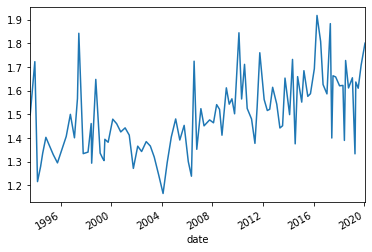

In [37]:
grouped = df.groupby('release_date')
colorf = lambda key : tuple(colors.hsv_to_rgb(((key.year - 1993) / 27, 1, 0.5)))
fig, ax = plt.subplots()
means = []
dates = []
sets =  []
for key, group in grouped:
    means += [group.stat_cost_ratio.mean()]
    dates += [key]
    sets  += [group.code.iloc[0]]
data = pd.DataFrame(data=np.array([dates, sets, means]).T,
                    columns=['date', 'set', 'mean'])
# calc the trendline
# z = np.polyfit(data.date, data.mean, 1)
# p = np.poly1d(z)
# plt.plot(data.date,p(data.date),"r--")
data.plot(ax = ax, x='date', y='mean', label=None)
ax.get_legend().remove();

In [38]:
grouped = df.groupby('release_date')
print(len(grouped))
for key, group in grouped:
    if key.year == 2004:
        print(group.code.iloc[0])
    print(key, group.stat_cost_ratio.mean())

100
1993-08-05 00:00:00 1.4982954545454545
1993-12-17 00:00:00 1.7228682170542635
1994-03-04 00:00:00 1.2159523809523807
1994-06-01 00:00:00 1.2793174603174597
1994-08-01 00:00:00 1.3359835600907028
1994-11-01 00:00:00 1.4030864197530863
1995-06-01 00:00:00 1.330228937728938
1995-10-01 00:00:00 1.2951282051282054
1996-06-10 00:00:00 1.4067204301075271
1996-10-08 00:00:00 1.500190476190476
1997-02-03 00:00:00 1.4010763209393344
1997-05-01 00:00:00 1.5672473867595818
1997-06-09 00:00:00 1.842792792792793
1997-10-14 00:00:00 1.33416184041184
1998-03-02 00:00:00 1.3406565656565657
1998-06-01 00:00:00 1.4612312030075185
1998-06-15 00:00:00 1.2938025210084032
1998-10-12 00:00:00 1.647926929392447
1999-02-15 00:00:00 1.3363287250384022
1999-05-01 00:00:00 1.3137182539682541
1999-06-07 00:00:00 1.3047949735449733
1999-07-01 00:00:00 1.3947845804988663
1999-10-04 00:00:00 1.382190476190476
2000-02-14 00:00:00 1.4798280423280423
2000-06-05 00:00:00 1.4608268983268984
2000-10-02 00:00:00 1.425885

# Day 3 Work

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import colors

In [40]:
df = pd.read_csv('final_mtg_data.csv', index_col='Unnamed: 0')
df

,name,cmc,colors,type,subtypes,rarity,power,toughness,image_url,code,release_date
0,Abattoir Ghoul,4.0,['Black'],Creature — Zombie,['Zombie'],Uncommon,3,2,http://gatherer.wizards.com/Handlers/Image.ash...,ISD,2011-09-30
1,Abbey Gargoyles,5.0,['White'],Creature — Gargoyle,['Gargoyle'],Uncommon,3,4,http://gatherer.wizards.com/Handlers/Image.ash...,HML,1995-10-01
2,Abbey Griffin,4.0,['White'],Creature — Griffin,['Griffin'],Common,2,2,http://gatherer.wizards.com/Handlers/Image.ash...,ISD,2011-09-30
3,Abbey Matron,3.0,['White'],Creature — Human Cleric,"['Human', 'Cleric']",Common,1,3,http://gatherer.wizards.com/Handlers/Image.ash...,HML,1995-10-01
4,Abbot of Keral Keep,2.0,['Red'],Creature — Human Monk,"['Human', 'Monk']",Rare,2,1,http://gatherer.wizards.com/Handlers/Image.ash...,ORI,2015-07-17
...,...,...,...,...,...,...,...,...,...,...,...
10085,Zur the Enchanter,4.0,"['Black', 'Blue', 'White']",Legendary Creature — Human Wizard,"['Human', 'Wizard']",Rare,1,4,http://gatherer.wizards.com/Handlers/Image.ash...,CSP,2006-07-21
10086,Zuran Enchanter,2.0,['Blue'],Creature — Human Wizard,"['Human', 'Wizard']",Common,1,1,http://gatherer.wizards.com/Handlers/Image.ash...,ICE,1995-06-01
10087,Zuran Spellcaster,3.0,['Blue'],Creature — Human Wizard,"['Human', 'Wizard']",Common,1,1,http://gatherer.wizards.com/Handlers/Image.ash...,ICE,1995-06-01
10088,Zurgo Bellstriker,1.0,['Red'],Legendary Creature — Orc Warrior,"['Orc', 'Warrior']",Rare,2,2,http://gatherer.wizards.com/Handlers/Image.ash...,DTK,2015-03-27


In [41]:
df.release_date = pd.to_datetime(df.release_date)

In [42]:
df['total_pt'] = df.power + df.toughness

In [43]:
df.colors = df.colors.apply(lambda x : x.strip('][').replace("'", "").split(', '))

In [44]:
df.subtypes = df.subtypes.apply(lambda x : x.strip('][').replace("'", "").split(', '))

In [45]:
df['legendary'] = df.type.apply(lambda x : 'Legendary' in x)

In [46]:
df['stat_cost_ratio'] = df[['total_pt', 'cmc']].apply(lambda x: x[0] / x[1] if x[1] > 0 else 0, axis=1)

In [47]:
df = df[['name', 'colors', 'power',
       'toughness', 'total_pt', 'cmc', 'stat_cost_ratio', 'type', 'subtypes', 'rarity', 'image_url', 'code', 'release_date']]

In [48]:
df.stat_cost_ratio.isnull().sum()

0

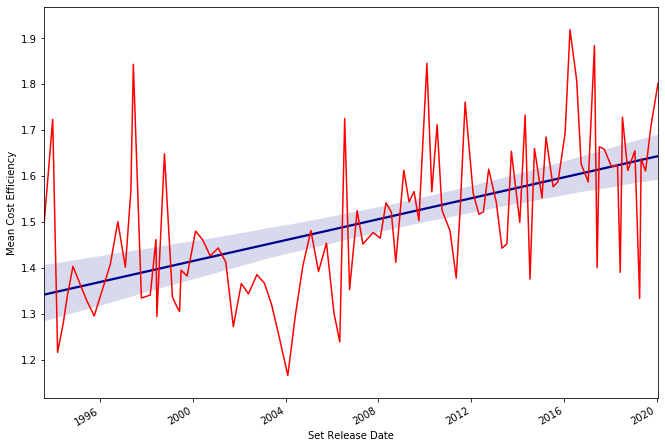

In [49]:
grouped = df.groupby('release_date')
fig = plt.figure(figsize=(11, 8))
ax = plt.subplot()
means = []
dates = []
sets  = []
for key, group in grouped:
    means += [group.stat_cost_ratio.mean()]
    dates += [key]
    sets  += [group.code.iloc[0]]
data = pd.DataFrame(data = np.array([dates, sets, means]).T,
                    columns = ['Set Release Date', 'set', 'Mean Cost Efficiency'])
ax.set_xlim(data['Set Release Date'].min(), data['Set Release Date'].max())
ax.set_ylim(data['Mean Cost Efficiency'].min()-0.05, data['Mean Cost Efficiency'].max()+0.05)
data['Set Release Date'] = data['Set Release Date'].apply(lambda x : x.toordinal())

# calc the trendline
sns.regplot(data['Set Release Date'],
            data['Mean Cost Efficiency'],
            ax = ax,
            scatter = False,
            color = 'darkblue')

data['Set Release Date'] = data['Set Release Date'].apply(dt.datetime.fromordinal)
data.plot(ax = ax,
          x = 'Set Release Date', 
          y = 'Mean Cost Efficiency',
          legend = False,
          color = 'red')
plt.show()

In [50]:
def colors_to_flag(list_of_colors):
    flag = 0
    colors = ['White', 'Blue', 'Black', 'Red', 'Green']
    for i in range(5):
        if colors[i] in list_of_colors:
            flag += 2 ** i
    return flag

In [51]:
df['colorcode'] = df.colors.apply(colors_to_flag)

In [52]:
color_stratifications = {
    'colorless': df[df.colorcode.apply(lambda x, flag : x & flag == flag, args = [0])],
    'white': df[df.colorcode.apply(lambda x, flag : x & flag == flag, args = [1])],
    'blue': df[df.colorcode.apply(lambda x, flag : x & flag == flag, args = [2])],
    'black': df[df.colorcode.apply(lambda x, flag : x & flag == flag, args = [4])],
    'red': df[df.colorcode.apply(lambda x, flag : x & flag == flag, args = [8])],
    'green': df[df.colorcode.apply(lambda x, flag : x & flag == flag, args = [16])]
}

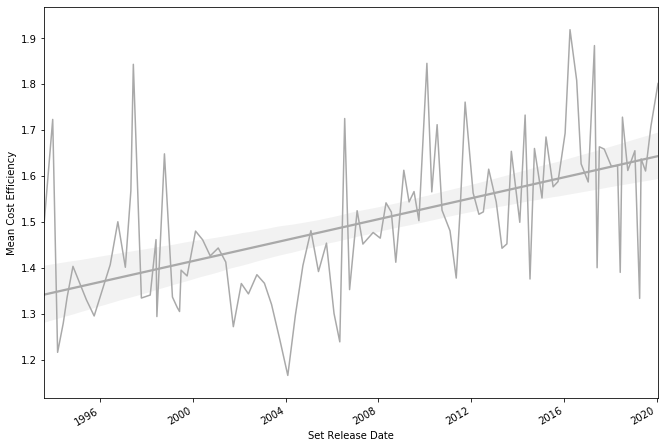

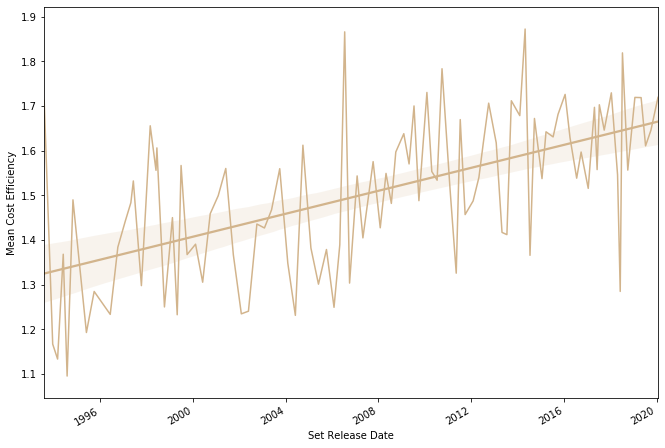

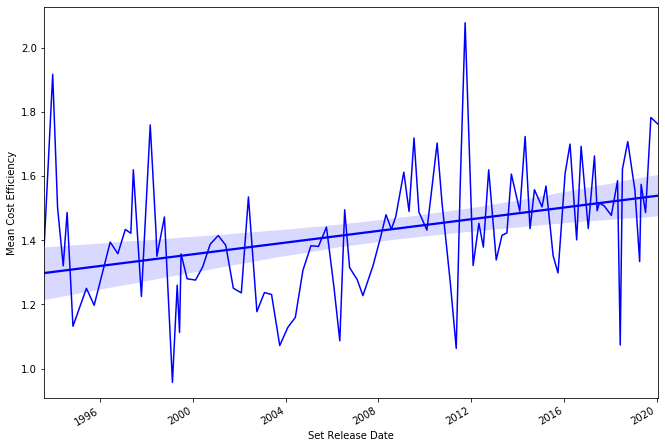

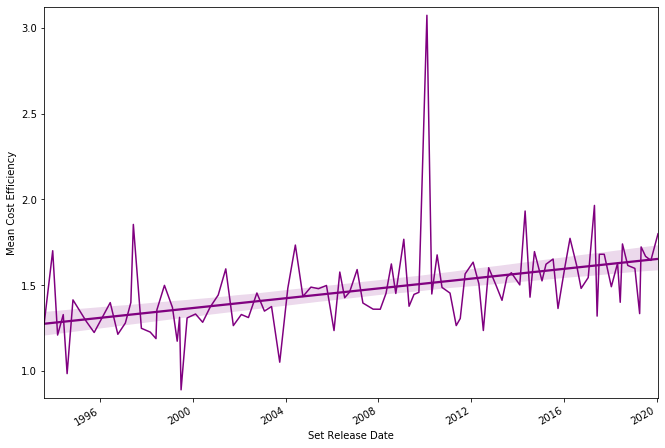

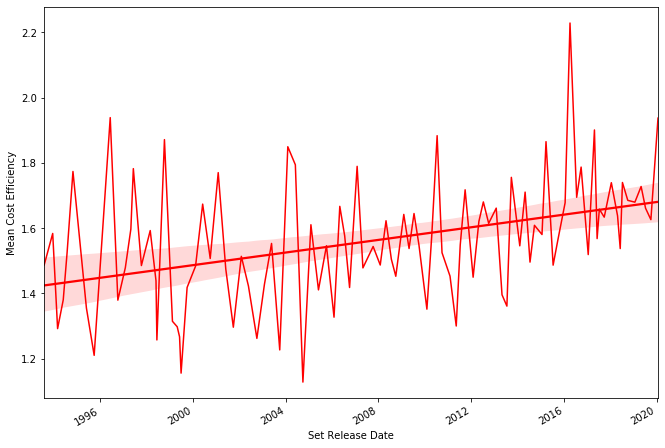

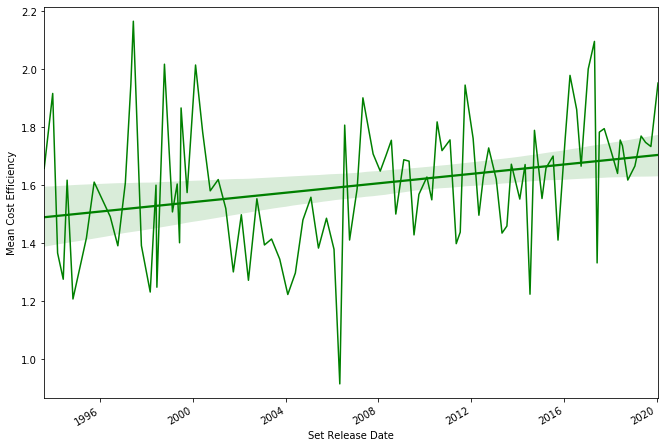

In [53]:
colors = {
    'colorless': 'darkgray',
    'white': 'tan',
    'blue': 'blue',
    'black': 'purple',
    'red': 'red',
    'green': 'green'
}
for color, cards in color_stratifications.items():
    fig = plt.figure(figsize=(11, 8))
    ax = plt.subplot()
    grouped = cards.groupby('release_date')
    means = []
    dates = []
    sets  = []
    for key, group in grouped:
        means += [group.stat_cost_ratio.mean()]
        dates += [key]
        sets  += [group.code.iloc[0]]
    data = pd.DataFrame(data = np.array([dates, sets, means]).T,
                        columns = ['Set Release Date', 'set', 'Mean Cost Efficiency'])
    ax.set_xlim(data['Set Release Date'].min(), data['Set Release Date'].max())
    ax.set_ylim(data['Mean Cost Efficiency'].min()-0.05, data['Mean Cost Efficiency'].max()+0.05)
    data['Set Release Date'] = data['Set Release Date'].apply(lambda x : x.toordinal())
    # calc the trendline
    sns.regplot(data['Set Release Date'],
                data['Mean Cost Efficiency'],
                ax = ax,
                scatter = False,
                color = colors[color])
    
    data['Set Release Date'] = data['Set Release Date'].apply(dt.datetime.fromordinal)
    data.plot(ax = ax,
              x = 'Set Release Date', 
              y = 'Mean Cost Efficiency',
              legend = False,
              color = colors[color])
    plt.show()

In [54]:
from IPython.display import display
fig = plt.figure(figsize=(11, 40))
grouped = color_stratifications['white'].groupby('release_date')
means = []
dates = []
sets  = []
for key, group in grouped:
    means += [group.stat_cost_ratio.mean()]
    dates += [key]
    sets  += [group.code.iloc[0]]
data = pd.DataFrame(data=np.array([dates, sets, means]).T,
                    columns=['date', 'set', 'means'])
display(data)

,date,set,means
0,1993-08-05,LEA,1.71212
1,1993-12-17,ARN,1.16667
2,1994-03-04,ATQ,1.13333
3,1994-06-01,LEG,1.36798
4,1994-08-01,DRK,1.09524
...,...,...,...
94,2019-01-25,RNA,1.71911
95,2019-05-03,WAR,1.71867
96,2019-07-12,M20,1.61067
97,2019-10-04,ELD,1.64537


<Figure size 792x2880 with 0 Axes>

In [55]:
color_stratifications['black'][color_stratifications['black'].code == 'WWK']

,name,colors,power,toughness,total_pt,cmc,stat_cost_ratio,type,subtypes,rarity,image_url,code,release_date,colorcode
21,Abyssal Persecutor,[Black],6,6,12,4.0,3.000000,Creature — Demon,[Demon],Mythic,http://gatherer.wizards.com/Handlers/Image.ash...,WWK,2010-02-05,4
110,Agadeem Occultist,[Black],0,2,2,3.0,0.666667,Creature — Human Shaman Ally,"[Human, Shaman, Ally]",Rare,http://gatherer.wizards.com/Handlers/Image.ash...,WWK,2010-02-05,4
302,"Anowon, the Ruin Sage",[Black],4,3,7,5.0,1.400000,Legendary Creature — Vampire Shaman,"[Vampire, Shaman]",Rare,http://gatherer.wizards.com/Handlers/Image.ash...,WWK,2010-02-05,4
956,Bloodhusk Ritualist,[Black],2,2,4,3.0,1.333333,Creature — Vampire Shaman,"[Vampire, Shaman]",Uncommon,http://gatherer.wizards.com/Handlers/Image.ash...,WWK,2010-02-05,4
1022,Bojuka Brigand,[Black],1,1,2,2.0,1.000000,Creature — Human Warrior Ally,"[Human, Warrior, Ally]",Common,http://gatherer.wizards.com/Handlers/Image.ash...,WWK,2010-02-05,4
1204,Butcher of Malakir,[Black],5,4,9,7.0,1.285714,Creature — Vampire Warrior,"[Vampire, Warrior]",Rare,http://gatherer.wizards.com/Handlers/Image.ash...,WWK,2010-02-05,4
1324,Caustic Crawler,[Black],4,3,7,5.0,1.400000,Creature — Insect,[Insect],Uncommon,http://gatherer.wizards.com/Handlers/Image.ash...,WWK,2010-02-05,4
1931,Death's Shadow,[Black],13,13,26,1.0,26.000000,Creature — Avatar,[Avatar],Rare,http://gatherer.wizards.com/Handlers/Image.ash...,WWK,2010-02-05,4
4285,Jagwasp Swarm,[Black],3,2,5,4.0,1.250000,Creature — Insect,[Insect],Common,http://gatherer.wizards.com/Handlers/Image.ash...,WWK,2010-02-05,4
4393,Kalastria Highborn,[Black],2,2,4,2.0,2.000000,Creature — Vampire Shaman,"[Vampire, Shaman]",Rare,http://gatherer.wizards.com/Handlers/Image.ash...,WWK,2010-02-05,4


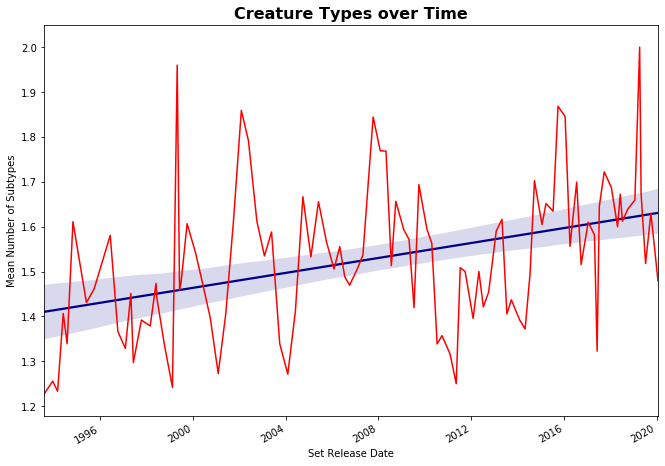

In [63]:
fig = plt.figure(figsize=(11, 8))
ax = plt.subplot()

df['number_of_subtypes'] = df.subtypes.apply(len)
grouped = df.groupby('release_date')
means = []
dates = []
sets  = []
for key, group in grouped:
    means += [group.number_of_subtypes.mean()]
    dates += [key]
    sets  += [group.code.iloc[0]]
data = pd.DataFrame(data=np.array([dates, sets, means]).T,
                    columns=['Set Release Date', 'set', 'Mean Number of Subtypes'])
ax.set_xlim(data['Set Release Date'].min(), data['Set Release Date'].max())
ax.set_ylim(data['Mean Number of Subtypes'].min()-0.05, data['Mean Number of Subtypes'].max()+0.05)
data['Set Release Date'] = data['Set Release Date'].apply(lambda x : x.toordinal())
# plot the trendline
plt.title("Creature Types over Time", fontweight="bold", fontsize=16)
sns.regplot(data['Set Release Date'], data['Mean Number of Subtypes'], scatter = False, ax = ax, color = 'darkblue')

data['Set Release Date'] = data['Set Release Date'].apply(dt.datetime.fromordinal)
data.plot(ax = ax, x = 'Set Release Date', y = 'Mean Number of Subtypes', label = None, legend = False, color = 'red')

plt.show()